# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [11]:
#Impoert Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [12]:
# Memuat Dataset
df = pd.read_csv('sample_data/hasil_clustering.csv')

# Melihat beberapa baris pertama untuk memastikan data telah dimuat dengan benar
df.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Cluster
0,1.0,0.191919,0.078958,0.39,0.555556,0.0625,0.375,0
1,1.0,0.212121,0.184236,0.81,0.222222,0.1875,0.250,0
2,0.0,0.202020,0.452694,0.06,0.222222,0.0625,0.000,1
3,0.0,0.232323,0.310569,0.77,0.777778,0.0000,0.125,2
4,0.0,0.313131,0.200027,0.40,0.333333,0.1250,0.625,1


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [13]:
# Data Splitting

# Menentukan fitur (X) dan target (y)
X = df.drop(columns=['Cluster'])  # Fitur: Semua kolom kecuali kolom target 'Cluster'
y = df['Cluster']                # Target: Kolom Cluster

# Mengecek data X dan y
print("Fitur (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())

# Memisahkan data menjadi Training Set dan Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Menampilkan jumlah data pada Training Set dan Test Set
print("\nJumlah data dalam Training dan Test Set:")
print(f"Training Set: {X_train.shape[0]} sampel")
print(f"Test Set: {X_test.shape[0]} sampel")

# Mengecek distribusi target pada Training dan Test Set
print("\nDistribusi target pada Training Set:")
print(y_train.value_counts())
print("\nDistribusi target pada Test Set:")
print(y_test.value_counts())

Fitur (X):
   Gender       Age  Annual Income ($)  Spending Score (1-100)  Profession  \
0     1.0  0.191919           0.078958                    0.39    0.555556   
1     1.0  0.212121           0.184236                    0.81    0.222222   
2     0.0  0.202020           0.452694                    0.06    0.222222   
3     0.0  0.232323           0.310569                    0.77    0.777778   
4     0.0  0.313131           0.200027                    0.40    0.333333   

   Work Experience  Family Size  
0           0.0625        0.375  
1           0.1875        0.250  
2           0.0625        0.000  
3           0.0000        0.125  
4           0.1250        0.625  

Target (y):
0    0
1    0
2    1
3    2
4    1
Name: Cluster, dtype: int64

Jumlah data dalam Training dan Test Set:
Training Set: 1600 sampel
Test Set: 400 sampel

Distribusi target pada Training Set:
Cluster
0    651
1    530
2    419
Name: count, dtype: int64

Distribusi target pada Test Set:
Cluster
0    163
1

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [16]:
# Inisialisasi Model
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Melatih Model dengan Data Latih
print("Melatih model Random Forest...")
rf_model.fit(X_train, y_train)

print("Melatih model K-Nearest Neighbors...")
knn_model.fit(X_train, y_train)

Melatih model Random Forest...
Melatih model K-Nearest Neighbors...


KNeighborsClassifier()

Pada proses klasifikasi ini, saya menggunakan dua algoritma klasifikasi yang populer, yaitu Random Forest Classifier dan K-Nearest Neighbors (KNN). Berikut adalah penjelasan mendetail tentang kedua algoritma ini:

1. Random Forrest Classifier
Random Forest adalah algoritma klasifikasi yang termasuk dalam kategori ensemble learning, yang berarti ia menggabungkan beberapa model untuk menghasilkan prediksi yang lebih stabil dan akurat. Algoritma ini bekerja dengan membangun banyak pohon keputusan (Decision Trees) menggunakan teknik bootstrap sampling, yang mengambil sampel acak dari data dengan pengembalian untuk masing-masing pohon. Setiap pohon dalam Random Forest hanya menggunakan subset acak dari fitur yang ada di dataset, yang membuatnya berbeda satu sama lain dan mengurangi risiko overfitting. Prediksi akhir dilakukan dengan cara majority voting, yaitu memilih hasil yang paling sering muncul di antara seluruh pohon. Kelebihan utama dari Random Forest adalah kemampuannya untuk menangani data dengan banyak fitur, mengurangi overfitting, dan robust terhadap outlier serta data yang tidak seimbang. Namun, kekurangannya terletak pada kompleksitas model yang membuatnya lebih lambat untuk memproses data dalam jumlah besar dan sulit untuk diinterpretasikan karena melibatkan banyak pohon keputusan.

2. K-Nearest Neighbors (KNN)
K-Nearest Neighbors (KNN) adalah algoritma klasifikasi yang sangat sederhana namun efektif, yang didasarkan pada konsep jarak antar titik data. Pada dasarnya, algoritma ini memeriksa kedekatan titik data baru dengan titik data yang sudah ada, lalu menentukan kelas berdasarkan mayoritas dari k tetangga terdekat. Untuk menghitung jarak antar titik data, biasanya digunakan metrik Euclidean yang mengukur jarak lurus antara dua titik dalam ruang fitur. Setelah jarak dihitung, algoritma memilih k titik terdekat dan mengklasifikasikan data berdasarkan label yang paling sering muncul di antara tetangga-tetangga tersebut. KNN tidak memerlukan model pelatihan secara eksplisit, sehingga mudah diimplementasikan dan sangat intuitif. Kelebihan dari KNN adalah kemampuannya untuk bekerja dengan data yang tidak terdistribusi secara normal dan keefektifannya pada dataset kecil serta seimbang. Namun, KNN memiliki kelemahan pada data yang besar karena waktu komputasi yang dibutuhkan untuk menghitung jarak antar setiap titik data. Selain itu, KNN sensitif terhadap skala fitur dan dapat terpengaruh oleh noise karena tidak ada mekanisme pembelajaran eksplisit yang diterapkan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.


Melakukan prediksi pada data uji...

===== Evaluasi Model: Random Forest =====
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1-Score: 0.99

Classification Report Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       0.98      1.00      0.99       133
           2       1.00      0.97      0.99       104

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



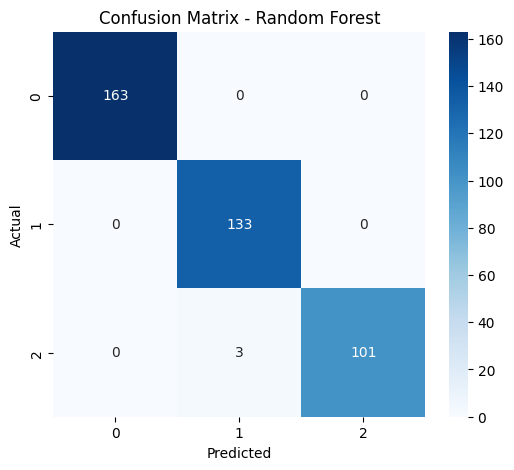


===== Evaluasi Model: K-Nearest Neighbors (KNN) =====
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1-Score: 0.99

Classification Report KNN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       0.98      0.98      0.98       133
           2       0.97      0.98      0.98       104

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



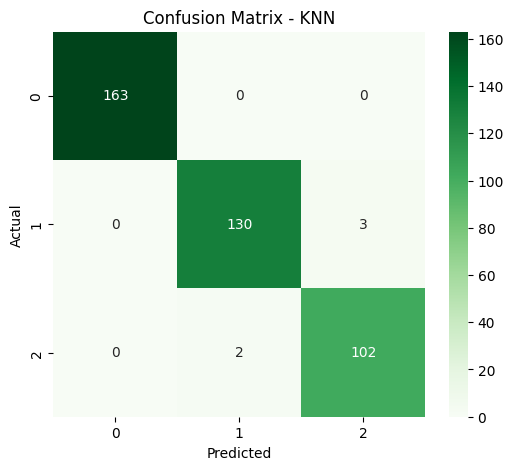

In [17]:
# Prediksi pada Data Uji
print("\nMelakukan prediksi pada data uji...")
y_pred_rf = rf_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

# Evaluasi Model
# Evaluasi Random Forest
print("\n===== Evaluasi Model: Random Forest =====")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_rf, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_rf, average='weighted'):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf, average='weighted'):.2f}")
print("\nClassification Report Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Visualisasi Confusion Matrix Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Evaluasi KNN
print("\n===== Evaluasi Model: K-Nearest Neighbors (KNN) =====")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_knn, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_knn, average='weighted'):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn, average='weighted'):.2f}")
print("\nClassification Report KNN:")
print(classification_report(y_test, y_pred_knn))

# Visualisasi Confusion Matrix KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Greens", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Dua algoritma klasifikasi telah digunakan dalam evaluasi ini, yaitu Random Forest dan K-Nearest Neighbors (KNN). Berikut adalah analisis rinci berdasarkan Classification Report dan Confusion Matrix:

1. **Evaluasi Random Forest**
- Akurasi: 99%
- Precision: 99%
- Recall: 99%
- F1-Score: 99%

**Confusion Matrix** (Random Forest):
- Kelas 0: Semua 163 data diklasifikasikan dengan benar.
- Kelas 1: Semua 133 data diklasifikasikan dengan benar.
- Kelas 2: 3 sampel dari kelas 2 diklasifikasikan ke kelas 1.

**Kelebihan:**
- Random Forest memiliki performa yang hampir sempurna, terutama pada kelas 0 dan kelas 1.
- Jumlah kesalahan prediksi sangat minim, hanya terjadi pada kelas 2.

2. **Evaluasi K-Nearest Neighbors (KNN)**
- Akurasi: 99%
- recision: 99%
- Recall: 99%
- F1-Score: 99%

**Confusion Matrix (KNN):**
- Kelas 0: Semua 163 data diklasifikasikan dengan benar.
- Kelas 1: 3 sampel dari kelas 1 diklasifikasikan ke kelas 2.
- Kelas 2: 2 sampel dari kelas 2 diklasifikasikan ke kelas 1.

**Kelebihan:**
- KNN juga memiliki performa yang sangat baik, dengan akurasi dan metrik evaluasi hampir sama dengan Random Forest.
- Sebagian besar data diklasifikasikan dengan benar.

Jadi kedua model memiliki performa yang sangat baik dan bisa digunakan tergantung pada kebutuhan.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.


Jawab:

2.
a. **Precision atau Recall Rendah untuk Kelas Tertentu**
Pada Random Forest, meskipun memiliki accuracy yang sangat tinggi sebesar 99%, kelemahan kecil terlihat pada kelas 2, di mana nilai Recall adalah 0.97. Hal ini berarti terdapat 3 sampel dari kelas 2 yang salah diklasifikasikan menjadi kelas 1. Situasi ini menunjukkan bahwa model belum sepenuhnya optimal dalam mengenali kelas 2, meskipun performa keseluruhannya sudah baik. Kelemahan ini berpotensi disebabkan oleh ketidakseimbangan data atau pola yang kurang kuat dalam kelas minoritas.

Pada K-Nearest Neighbors (KNN), kinerja model lebih rendah dibandingkan Random Forest, terutama pada kelas 1 dan kelas 2. Untuk kelas 1, nilai Recall adalah 0.98, yang berarti terdapat 3 sampel dari kelas 1 yang salah diklasifikasikan menjadi kelas 2. Sementara itu, untuk kelas 2, Precision hanya mencapai 0.97, dengan 2 sampel dari kelas 2 salah diklasifikasikan menjadi kelas 1. Hal ini menunjukkan bahwa KNN lebih sensitif terhadap jarak antar data dan skala fitur, sehingga performanya sedikit menurun dibandingkan Random Forest, terutama ketika distribusi kelas tidak ideal.\


b. **Overfitting atau Underfitting**
Pada Random Forest, tidak terlihat tanda-tanda underfitting, karena model mampu mempelajari pola data dengan baik dan mencapai performa yang konsisten pada data latih dan uji. Namun, performa yang terlalu tinggi dengan akurasi 99% menunjukkan adanya potensi overfitting. Model cenderung “menghafal” data latih, meskipun jumlah kesalahan prediksi sangat minim pada data uji.

Sementara pada KNN, tanda overfitting lebih mungkin terjadi, terutama karena model menggunakan nilai n_neighbors=5, yang membuat KNN lebih sensitif terhadap data latih. Hal ini menyebabkan performa KNN sedikit menurun pada kelas tertentu ketika diuji, meskipun secara keseluruhan akurasi tetap tinggi. Penggunaan jumlah tetangga yang kecil cenderung memperbesar risiko overfitting, terutama jika dataset memiliki noise atau distribusi yang kurang ideal.


**Rekomendasi Tindakan Lanjutan**
Untuk meningkatkan performa model dan mengatasi kelemahan yang ada, beberapa langkah dapat dilakukan. Pertama, mengumpulkan data tambahan, terutama untuk kelas 2, yang menunjukkan performa Recall yang lebih rendah pada Random Forest dan KNN. Penambahan sampel akan membantu model mempelajari pola lebih baik dan mengatasi ketidakseimbangan data. Selain itu, teknik resampling, seperti SMOTE (Synthetic Minority Oversampling Technique), dapat diterapkan untuk menyeimbangkan distribusi kelas pada data latih.

Selanjutnya, lakukan hyperparameter tuning untuk kedua model. Untuk Random Forest, parameter seperti n_estimators dan max_depth dapat dioptimalkan melalui Grid Search atau Randomized Search. Untuk KNN, nilai n_neighbors dapat ditingkatkan untuk mengurangi sensitivitas model terhadap noise dan menghindari overfitting.

Selain itu, pertimbangkan penggunaan algoritma lain, seperti Gradient Boosting atau XGBoost, yang sering memberikan performa lebih baik dalam menangani data yang kompleks. Jika diperlukan, lakukan cross-validation untuk memastikan model lebih robust dan tidak overfit terhadap data tertentu. Terakhir, pastikan semua fitur sudah melalui scaling (normalisasi atau standarisasi), terutama untuk KNN yang sensitif terhadap skala data. Dengan langkah-langkah ini, performa model diharapkan dapat lebih optimal dan kelemahan pada kelas tertentu dapat diminimalkan.